# Groundwater Flow Modeling at the University at Buffalo
Lab 1: Hands on with Python
By Chris Lowry


## Objective:
Develop some really useful skills using Matlab to manipulate large data sets.


## Problem:
The purpose of this lab is to learn a few basic “tricks” using Python.  I assume that some of you have used some sort of computer code (Python,Matlab,Visual Basic) in your other classes so some information may be review.  For others this may all be new.  Please take your time in this lab and make sure you fully understand what you are doing before moving on.  The goal of this lab is to save you time in the future when you have to deal with large data sets. 


### Part I:  Matlab as a calculator
You should have already watched the video titles “Jupyter Notebook Tutorial” by Cory Schafer.  

https://www.youtube.com/watch?v=HW29067qVWk

This video gives you a quick (30 min) demonstration on how to navigate around in a Jypter Notebook.  There are several parts to this lab where you are going to write a set of commands.  The useful thing about the Jupyter notebook is you can do it right inside this file and run all your commands from this file.  That way at the end of the lab you will have one code that generates all answers to the lab sections. 


It is time to give things a spin on your own.    First, lets start by solving the following problems:

![alt text](Groundwater Modeling Lab 1 Equation 1.png "Title")

Below are the values for a,b, and c

| Problem Number | A | B | C |
| --- | --- | --- | --- |
| P1 | 7 | 4 | 10 |
| P2 | 3 | 5 | .01 |
| P3 | 2 | 1 | 3 |
| P4 | 2 | 9 | 7.3 |

There are two ways to set this problem up: 

1) You can just plug the numbers into the equation like this:

    (7+4)/10


2) You can define the variables a,b, and c and then set the equation up just as it is written in equation 1.

    a=7, b=4, c=10

    (a+b)/c


If you are only going to do this once, then option 1 would work but if you are going to have to do this 1000 times then we need a more efficient way of making these calculations.  If you use the same equation for a variety of different scenarios then option 2 is the way to go.  

As you might have already guessed there are multiple ways to make things easier.  If we were to write a matrix that contained the values for a,b, and c then we could just call each row of the matrix in Python and run it through the equation.  This would save a lot of time if we had 1000 scenarios.  So let try this by making a matrix with the values from Table 1.

Here is an example of how you build a matrix which we call a "data frame": we are going to call our data frame “data”

In [1]:
import pandas as pd

data = pd.DataFrame({'Problem Number':['P1','P2','P3','P4'],
                   'a,b,c':[(7,4,10),(3,5,0.1),(2,1,3),(4,9,7.3)]})


In the code above we have imported in a new set of modules/code called Pandas.  This code allows us to access additional functions in Python and in particular allows us to easily build data frames. 

Below we will then call "data" and see what it looks like.

In [2]:
data

,Problem Number,"a,b,c"
0,P1,"(7, 4, 10)"
1,P2,"(3, 5, 0.1)"
2,P3,"(2, 1, 3)"
3,P4,"(4, 9, 7.3)"


If we want to see a specific set of numbers in the data frame (i.e. row P2) we can call data and then .iloc with the specific row and column number in [].  

As a simple test change the code below to out put the values for a,b,c from Problem Number P4.  If you get an error think about how Python counts.

In [11]:
data.iloc[1][1]

(3, 5, 0.1)

Now that we have a data frame, we need to run through each row of the data frame and make our calculation.  To do this we are going to create something called a “for loop”.  At this point you should watch the “for loop” video Loops in Python by Kahn Academy.  

https://www.youtube.com/watch?v=9LgyKiq_hU0

Basically a “for loop” just counts from one to what ever number you define.  In our problem we have 4 rows of data in our data frame so we want to make a for loop that counts from 0 to 3 (remember that Python starts at zero).  In this case we are going to use the variable “i” to represent the number we are counting.  

It is going to look like this:

In [33]:
for i in range(3):
    
    #Then we will insert what we want to loop through here
    
    pass #This pass call just supresses any errors

Inside of the “for loop” we want to put equation 1.  That means your code is going to look something like this:

In [14]:
answer_full = [] #This is where we store the results

for i in range(4):
    
    #Pulling the values of a,b,c out of our data frame
    a,b,c = data.iloc[i][1]

    #Here is our calculation
    answer = (a+b)/c
    
    #Here we write the results to answer_full
    answer_full.append(answer) 
    
    #Printing our results (This is using a f string to make things more readable)
    print(f'Problem {i}: {answer}')

Problem 0: 1.1
Problem 1: 80.0
Problem 2: 1.0
Problem 3: 1.7808219178082192


Now lets try plotting these data.  Anytime you want to make a plot you have to start by importing a bit of code that allows you to plot data in this case it is called matplotlib.  We have just one vector, so it is really easy to plot this in Python.  Your code should look something like this:

Text(0,0.5,'Result')

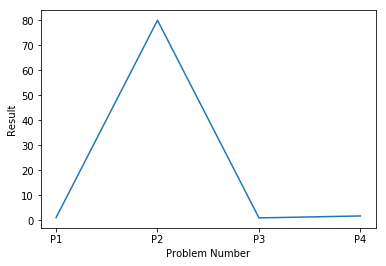

In [15]:
#Importing in our plotting code
import matplotlib.pyplot as plt

#Defining the y-axis lables
prob_num = ['P1','P2','P3','P4']

plt.plot(prob_num, answer_full)
plt.xlabel('Problem Number')
plt.ylabel('Result')


#### "Don't Panic" - Douglas Adams

There is also a lot of information on the web about how to define functions.  Most of the time I just type my Python questions directly into a search engine and you can quickly find an answer.  An example would be to type something into Google like “Plotting in Python”.

## Part II Analyzing Stream Stage	

Now I would like you to look at Stream Stage in the Tuolumne River.  In this case we are just going to be looking at the 2007 stream stage record.  

Download the stream stage data set entitled TuolumneStreamStage.txt

Your new data set is going to have three columns.  Column one is the year, column two is the Julian day, column three is the stream stage in meters above sea level.

In order to load these files into Python you need to use the “read_table” command using pandas.  Note that this file was tab delimited so we are using "delim_whitespace = True", if you have a comma delimited file you would call pd.read_csv(...).  It should turn out to look like this:


In [187]:
stream_data = pd.read_table('TuolumneStreamStage.txt', delim_whitespace=True, header = None)
stream_data

,0,1,2
0,2007,0.000000,2605.199247
1,2007,0.020833,2605.202247
2,2007,0.041667,2605.203247
3,2007,0.062500,2605.203247
4,2007,0.083333,2605.203247
5,2007,0.104167,2605.207247
6,2007,0.125000,2605.208717
7,2007,0.145833,2605.202657
8,2007,0.166667,2605.204657
9,2007,0.187500,2605.206657


### Plotting a hydrograph:

We are now going to generate a hydrograph for the Tuolumne River.  A hydrograph shows us how the stream stage in the river goes up and down based on different climatic events.

The plot we are going to generate will be a line plot of stage vs Julian day.  You should generate a plot that looks something like this.  Note: Make sure you add a title and axis labels.


Text(0.5,1,'Tuolumne River Hydrograph')

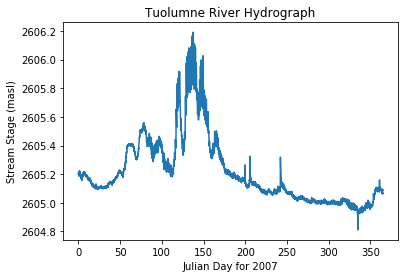

In [188]:
plt.plot(stream_data[1][:], stream_data[2][:])
plt.xlabel('Julian Day for 2007')
plt.ylabel('Stream Stage (masl)')
plt.title('Tuolumne River Hydrograph')

Now lets make a second plot that zooms in on these data from Julian day 300-310.  Make sure you add labels to the axis and put a title on it.  

Text(0.5,1,'Tuolumne River Hydrograph')

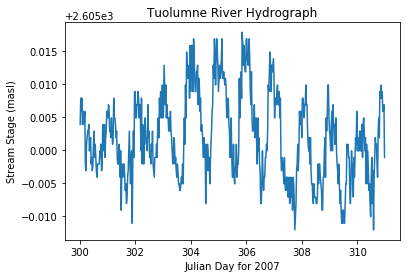

In [189]:
plt.plot(stream_data[1][14400:14927], stream_data[2][14400:14927])
plt.xlabel('Julian Day for 2007')
plt.ylabel('Stream Stage (masl)')
plt.title('Tuolumne River Hydrograph')

## Part III.  Determining the effect of changes in temperature on hydraulic conductivity.

We said in class that Hydraulic conductivity is dependent on both the density and viscosity of water.   Your next job is to build a plot showing the effect of temperature on hydraulic conductivity.  Below is a table showing the change in viscosity and density of water as a result of changes in temperature.  

I have also posted an Excel file with all these data.  Make it easy on yourself and don’t retype these numbers.  Figure out how to import in an Excel file to Python as a data frame.  It will take you a little longer the first time but once you learn how to do it will save you hours of time in the future.


![alt text](Viscosity_Table.png "Title")

Here is the equation that relates the viscosity and density to hydraulic conductivity.

![alt text](Temp_v_Viscosity_eqs.png "Title")

In [240]:
viscosity_data = pd.read_excel('Temperature_Density_Viscosity.xlsx', header = 0)
viscosity_data

,Temperature (oC),Density (kg/m3),Kinematic Viscosity (m2/s) x 10-6
0,0,999.9,1.787
1,5,1000.0,1.519
2,10,999.7,1.307
3,20,998.2,1.004
4,30,995.7,0.801
5,40,992.2,0.658
6,50,988.1,0.553
7,60,983.2,0.475
8,70,977.8,0.413
9,80,971.8,0.365


In [241]:
viscosity_data['K (m/s)'] = 'NaN'
k_in = 0.000001 #intrinsic permeability of sand [m^2]
for i in range(12):
    value=(k_in*(viscosity_data.iloc[i][1]*9.81)/viscosity_data.iloc[i][2])
    viscosity_data.iat[i,3]=value

viscosity_data

,Temperature (oC),Density (kg/m3),Kinematic Viscosity (m2/s) x 10-6,K (m/s)
0,0,999.9,1.787,0.0054891
1,5,1000.0,1.519,0.0064582
2,10,999.7,1.307,0.00750349
3,20,998.2,1.004,0.00975333
4,30,995.7,0.801,0.0121945
5,40,992.2,0.658,0.0147925
6,50,988.1,0.553,0.0175285
7,60,983.2,0.475,0.0203057
8,70,977.8,0.413,0.0232257
9,80,971.8,0.365,0.0261188


In [242]:
viscosity_data.iloc[:]['Density (kg/m3)']

0      999.9
1     1000.0
2      999.7
3      998.2
4      995.7
5      992.2
6      988.1
7      983.2
8      977.8
9      971.8
10     965.3
11     958.4
Name: Density (kg/m3), dtype: float64

Text(0.5,1,'Effect of changes in temperature on hydraulic conductivity')

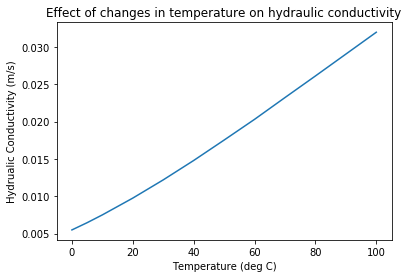

In [243]:
plt.plot(viscosity_data.iloc[:]['Temperature (oC)'], viscosity_data.iloc[:]['K (m/s)'])
plt.xlabel('Temperature (deg C)')
plt.ylabel('Hydrualic Conductivity (m/s)')
plt.title('Effect of changes in temperature on hydraulic conductivity')

## Part IV.  Fibonacci Numbers
Fibonacci numbers are a series of number that are based on a really simple mathematical formula.  The basic idea is you start with the numbers 0 and 1.  You then add these two numbers together and get a third number in the series.  To get the fourth number you add numbers two and three in the series.  This goes on forever.  If you were to write this in an equation it would look like this:


![alt text](Fibonacci Eqs.png "Title")

Fn is the Fibonacci number at position “n” which is based on the Fibonacci numbers at “n-1” and “n-2”.  In the example above these values would look as follows Fn = 1, Fn-1=1 and Fn-2=0.  What I want you to do is calculate the 72nd number in the Fibonacci series.

In [252]:
a = 0
b = 1
for num in range(72):
    a+b
    a,b = b,a+b

print(a)

498454011879264


The other way of doing this is what writing a function.

In [245]:
def fibonacci(n):
    a = 0
    b = 1
    for num in range(n):
        yield a+b
        a,b = b,a+b

In [253]:
for number in fibonacci(71):
    final = number
print(final)

498454011879264


## Part V.  Order of Magnitude and Fibonacci

There are times that it would be useful to run a calculation until you meet some predetermined criteria.  The idea is you are looking for a specific answer and you want your calculation to stop once you reach it.  This idea may be a little abstract as I am presenting it but next week everything will clear up significantly.  

Please find the Fibonacci number that is of the order of magnitude 1.0 x 10^299.  To do this I would suggest taking some time to learn about the Python operator “while”.  


In [250]:
a = 0
b = 1

while a <= 10**299:
    (a+b)
    a,b = b,a+b

print(a)
    

134835259728818360369862472539294559711539143770143212940057981728560475421016049945247304137202927782058170880319804942407644679152524664378105235799310479479325089485302871461646484522143446640723524497940728860950464653868410812096171855773515506958419620396000890990525907195607938740112010091853
